#Nepali Cash Recognizer 
In this notebook, I have tried to classify nepali cash which can be pretty useful for blind people. Credict for this dataset and project idea goes to [kshitzrimal](https://github.com/kshitizrimal/Cash-Recog-Project).  

I'll be using a fast.ai library which is high level library built on top of Pytorch.

In [0]:
# import libraries
from fastai.vision import create_cnn, ClassificationInterpretation, ImageItemList
from fastai.metrics import error_rate


Uncomment these lines to download image data zip file. Here, I have created a shareable link to image zip file so that anyone can download data easily.

In [4]:
# my_file_id = '1YjixsAkG1w4j13Bc9a0WqTVp6t3jCR7e'
#!gdown https://drive.google.com/uc?id={my_file_id}

Downloading...
From: https://drive.google.com/uc?id=1YjixsAkG1w4j13Bc9a0WqTVp6t3jCR7e
To: /content/full_data.zip
2.14GB [00:19, 112MB/s] 


In [0]:
!unzip -qq full_data.zip

In [0]:
path = 'full_data/train'

In [0]:
# intitializing bunch size and transformations
bs = 8
tfms = get_transforms()

In [0]:
# create a databunch 
data_train = (ImageItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_folder()
        .transform(tfms, size=224)
         .databunch(bs=bs))

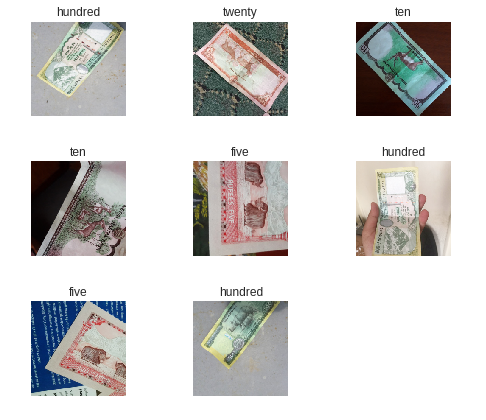

In [26]:
data_train.show_batch(rows= 3, figsize = (7,6))

In [0]:
# Creating a model
learn = create_cnn(data_train, models.resnet34, metrics=error_rate )

In [30]:
# training a model
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.158107,0.031635,0.009182
2,0.150029,0.008402,0.002504
3,0.055466,0.004091,0.001669
4,0.042671,0.002031,0.000835


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


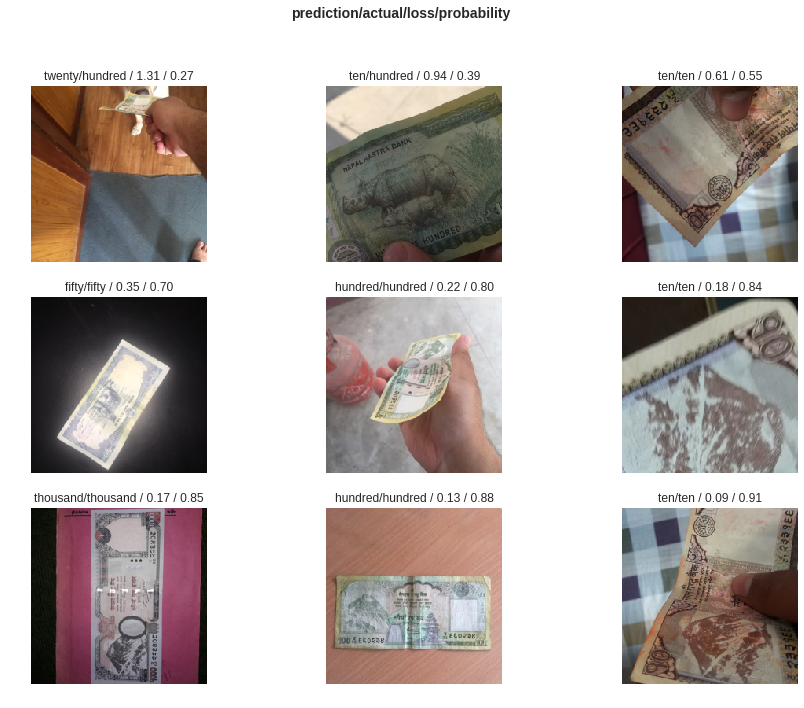

In [32]:
# Let's print top 9 losses 
interp.plot_top_losses(9, figsize=(15,11))

In [33]:

interp.most_confused(min_val=2)

[]

In [0]:
learn.save('stage-1')

Let's fine tune our model to get more accuracy.

In [0]:
learn.unfreeze()

In [37]:

learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate
1,0.241272,0.080511,0.020451
2,0.036621,0.001413,0.000000


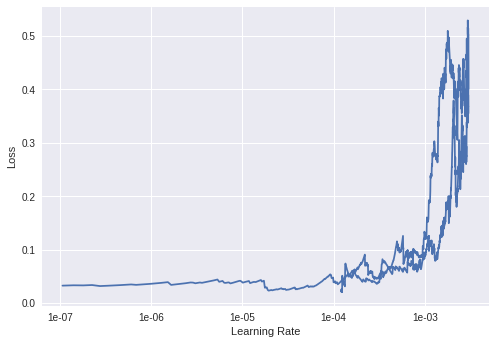

In [38]:
learn.recorder.plot()

In [0]:
learn.save('./stage-2')

In [0]:
learn2 = learn.load('./stage-2')

In [41]:

interp = ClassificationInterpretation.from_learner(learn2)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

False

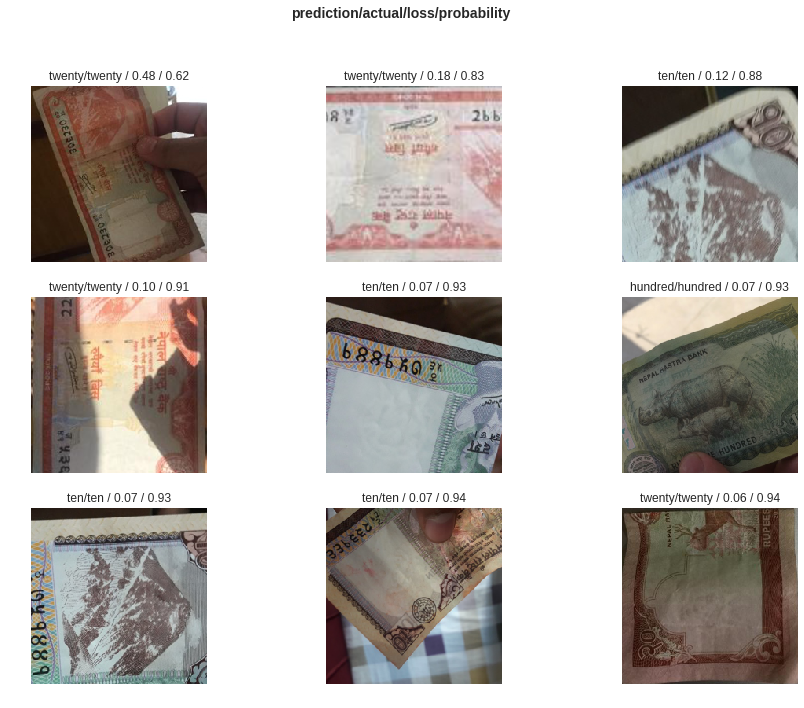

In [42]:
interp.plot_top_losses(9, figsize=(15,11))

It classifies validation set perfectly 100%. It might be overfitting. We need to check the results in test set.

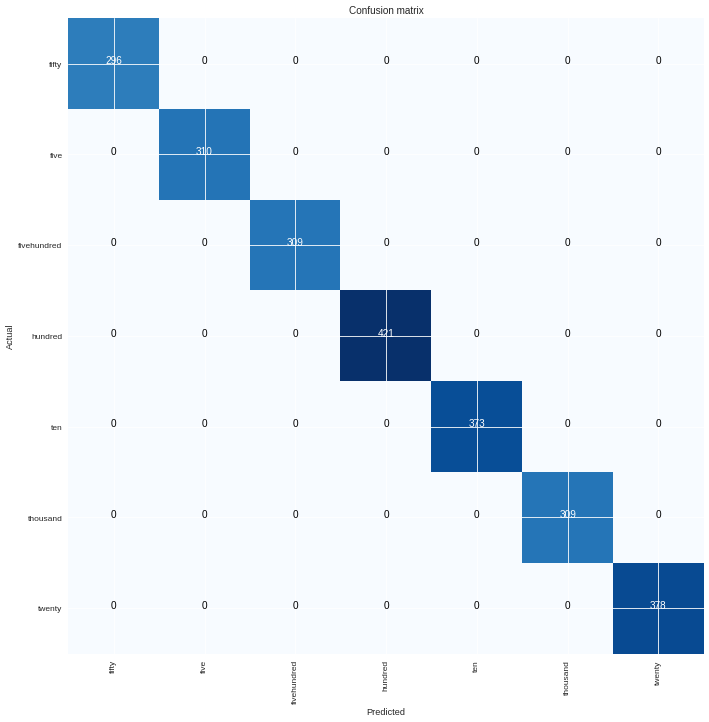

In [43]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
learn2.save('../resnet_final')